# Evaluación 1

**Integrantes:**

+ Integrante 1: Juan Diego Arévalo Durán : juan.arevalo2101@alumnos.ubiobio.cl
+ Integrante 2: Matías Rodrigo Muñoz Silva  : matias.munoz2201@alumnos.ubiobio.cl
+ Integrante 2: Matías Ignacio Vilches Bravo : matias.vilches2201@alumnos.ubiobio.cl

**Fecha de Entrega:** Abril 2025  
**Versión:** 1.0  

---

## Descripción

Este notebook contiene el desarrollo de la evaluación 1 de la asignatura de Inteligencia Artificial de la carrera Ingeniería Civil en Informática de la Universidad del Biío Bío - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- Pandas (2.2.2)
- Numpy (2.0.2)
- Matplotlib (3.10.0)
- Seaborn (0.13.2)
- Scipy (1.15.2)


Para verificar la versión instalada ejecutar usando el nombre del paquete del cual quieres saber la versión; por ejemplo, si quieres saber la versión de sklearn usas:

```bash
import numpy
print(numpy.__version__)
````

# Conjunto de datos y descripción

In [1]:
import pandas as pd
print(pd.__version__)
import numpy as np
print(np.__version__)
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
import seaborn as sns
print(sns.__version__)
import scipy.stats as stats
import scipy
print(scipy.__version__)
from statistics import mean, median, median_grouped


2.2.2
2.0.2
3.10.0
0.13.2
1.14.1


In [8]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/student_performance.csv

--2025-04-12 00:12:35--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/student_performance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172546 (169K) [text/plain]
Saving to: ‘student_performance.csv.1’

student_performance 100%[===================>] 168.50K  --.-KB/s    in 0.03s   

2025-04-12 00:12:36 (6.34 MB/s) - ‘student_performance.csv.1’ saved [172546/172546]



<table>
  <tr>
    <th>Columna</th>
    <th>Descripción</th>
  </tr>
  <tr>
    <td>Student_ID</td>
    <td>Identificador único del estudiante</td>
  </tr>
  <tr>
    <td>Hours_Studied</td>
    <td>Horas de estudio semanales</td>
  </tr>
  <tr>
    <td>Attendance_Rate</td>
    <td>Porcentaje de asistencia</td>
  </tr>
  <tr>
    <td>Assignments_Completed</td>
    <td>Núnero de tareas completadas</td>
  </tr>  
  <tr>
    <td>Midterm_Score</td>
    <td>Calificación del examen parcial (0-100)</td>
  </tr>
  <tr>
    <td>Final_Score</td>
    <td>Calificación del examen final (0-100)</td>
  </tr>
  <tr>
    <td>Project_Score</td>
    <td>Puntuación del proyecto final (0-100)</td>
  </tr>
  <tr>
    <td>Participation_Score</td>
    <td>Puntos por participación en clases(0-10)</td>
  </tr>
  <tr>
    <td>Study_Method</td>
    <td>Descripción del método de estudio (Kinesthetic, Visual, Auditory, Reading/ritting)</td>
  </tr>
</table>





---




In [3]:
data_frame = pd.read_csv("student_performance.csv")
data_frame

,Student_ID,Hours_Studied,Attendance_Rate,Assignments_Completed,Midterm_Score,Final_Score,Project_Score,Participation_Score,Study_Method
0,1,2,58,10,21,53,24,0,Kinesthetic
1,2,28,51,4,35,1,100,1,Visual
2,3,34,59,10,19,84,68,9,Auditory
3,4,38,62,2,27,24,66,5,Reading/Writing
4,5,17,83,3,67,100,28,8,Kinesthetic
...,...,...,...,...,...,...,...,...,...
4995,4996,15,69,2,37,67,96,10,Kinesthetic
4996,4997,16,89,1,2,96,45,1,Reading/Writing
4997,4998,34,76,1,9,85,74,7,Visual
4998,4999,1,91,2,1,94,57,6,Kinesthetic


# Cantidad de observaciones y características

In [ ]:
data_frame.shape

(5000, 9)

---
✅ **Interpretación**

---

+ Existen 5000 estudiantes

+ Cada estudiante tiene 9 características, las cuales son Student_ID, Hours_Studied, Attendance_Rate Assignments_Completed, Midterm_Score, Final_Score, Project_Score, Participation_Score, Study_Method

#Detección de nulos

In [ ]:
pd.DataFrame(data_frame.isnull().sum(), columns=["Cantidad de nulos"]).T

,Student_ID,Hours_Studied,Attendance_Rate,Assignments_Completed,Midterm_Score,Final_Score,Project_Score,Participation_Score,Study_Method
Cantidad de nulos,0,0,0,0,0,0,0,0,0


---
✅ **Interpretación**

---

+ No se presenta ningún nulo en el dataframe

#Detección de atípicos

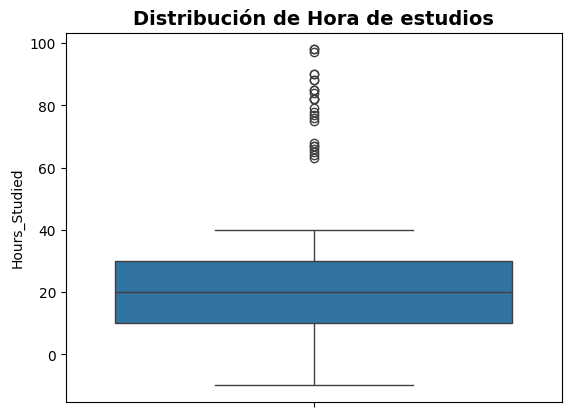

In [ ]:
sns.boxplot(y='Hours_Studied', data=data_frame)
plt.title("Distribución de Hora de estudios", fontsize=14, fontweight="bold")
plt.show()

---
✅ **Interpretación**

---

+ Se detecta la presencia de atípicos que se reconocen como los valores que se encuentran por sobre el límite superior y también los que se encuentran bajo el límite inferior

# Estadística descriptiva

## Variable continua

Deberá incluir el cálculo e interpretación de las siguientes medidas estadísticas:
+ Medidas de posición (primer, segundo y tercer cuartil)
+ Desviación estándar
+ Mediana agrupada
+ Promedio


In [ ]:
describes= data_frame['Hours_Studied'].describe()
mediana_agrupada = median_grouped(data_frame['Hours_Studied'])
print(f"mediana agrupada: {mediana_agrupada:.2f} ")
print(describes)

mediana agrupada: 20.13 
count    5000.000000
mean       20.243400
std        12.609931
min       -10.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        98.000000
Name: Hours_Studied, dtype: float64


---
✅ **Interpretación**

---

+ El promedio de hora de estudio de los estudiantes es de 20
+ Un 25% de los estudiantes estudia mayor o igual a 30 horas
+ Un 25% estudia a lo mas 10 horas
+ La media agrupada es de 20.13 horas
+ Se observa un minimo negativo de horas estudiado lo cual no tiene coherencia con el contexto de los datos
+ El maximo de horas estudiadas es de 98


## Variable discreta

La moda de Study_Method es: Auditory
Frecuencia: 1288


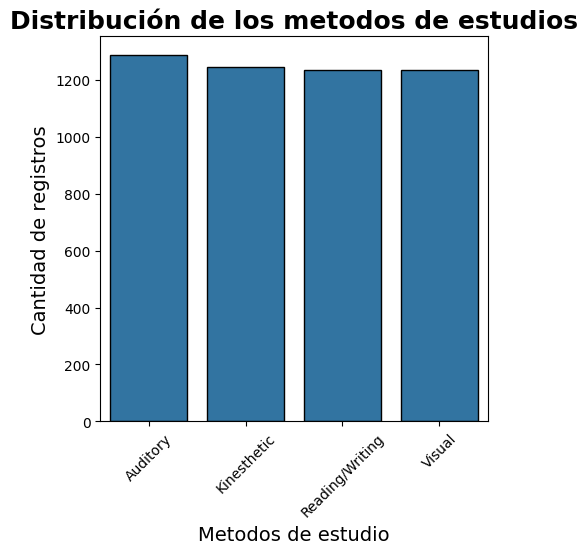

In [ ]:

# Obtiene las frecuencias de los metodos de estudio
valores = data_frame.groupby('Study_Method')['Study_Method'].count().sort_values(ascending = False)
titulo = u"Distribución de los metodos de estudios"
# Tamaño del grafico: (ancho, largo)
plt.figure(figsize=(5,5))

# Usamos el gráfico de barras de seaborn
sns.barplot(x=valores.index, y=valores, edgecolor='black')

# Asignamos etiquetas a eje x, y asi como tambien el titulo del gráfico
plt.xlabel('Metodos de estudio', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Cantidad de registros', fontsize=14)
plt.title(titulo, fontsize=18, fontweight="bold")

moda = data_frame['Study_Method'].mode()[0]
frecuencia = data_frame['Study_Method'].value_counts()[moda]

print(f"La moda de Study_Method es: {moda}")
print(f"Frecuencia: {frecuencia}")

---
✅ **Interpretación**

---


+ La moda de los metodos de estudio es Auditory con una frecuencia de 1288, aunque se aprecia que es muy leve la diferencia con los otros metodos de estudio
+ se puede observar que los metodos de estudio estan bastante distribuidos entre los estudiantes
+ se observa que los metodos de estudio menos utilizado son Reading/Writing y Visual

# Análisis de frecuencia de método de estudio

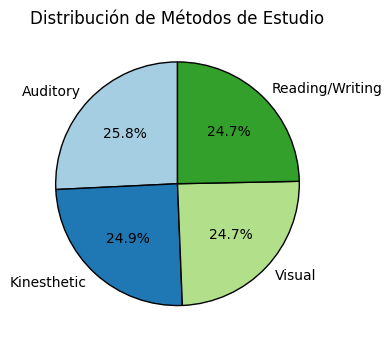

In [ ]:
plt.figure(figsize=(4, 5))
conteo = data_frame['Study_Method'].value_counts()
conteo.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Distribución de Métodos de Estudio")
plt.ylabel('')
plt.tight_layout()
plt.show()

---
✅ **Interpretación**

---

+ Se puede observar 4 metodos de estudios presentes en los estudiantes
+ No se observa ninguna preferencia exagerada por algun metodo en especifico ya que Auditory tiene una muy leve ventaja sobre el resto
+ El más utilizado es Auditory y los menos utilizados son Reading/Writing y Visual

# Análisis de simetría/asimetría

## Variable elegida por el equipo que será analizada

In [ ]:
# Variable Horas estudiadas
moda = data_frame['Hours_Studied'].mode()[0]
mediana = np.quantile(data_frame.Hours_Studied, 0.5)
media = np.mean(data_frame.Hours_Studied)
print("Moda {0} - Mediana {1} - Media {2}".format(moda, mediana, media))

Moda 19 - Mediana 20.0 - Media 20.2434


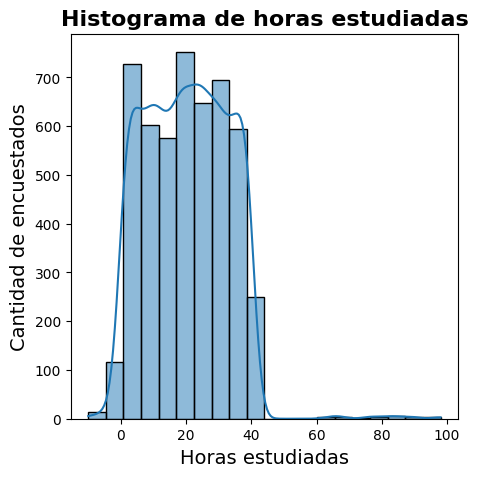

In [ ]:
# Variable Horas estudiadas
num_bins = 20
plt.figure(figsize=(5,5))
sns.histplot(data_frame.Hours_Studied, kde=True, bins = num_bins)
plt.xlabel('Horas estudiadas', fontsize=14)
plt.ylabel('Cantidad de encuestados', fontsize=14)
plt.title(r'Histograma de horas estudiadas', fontsize=16, fontweight="bold");

---
✅ **Interpretación**

---


+ La simetría observada es positiva ya que la moda en menor a la mediana la cual tambien es menor a la media, esto lo podemos observar en el gráfico

# Visualizaciones

## Distribución de una variable continua

Moda 116 - Mediana 75.0 - Media 74.7162


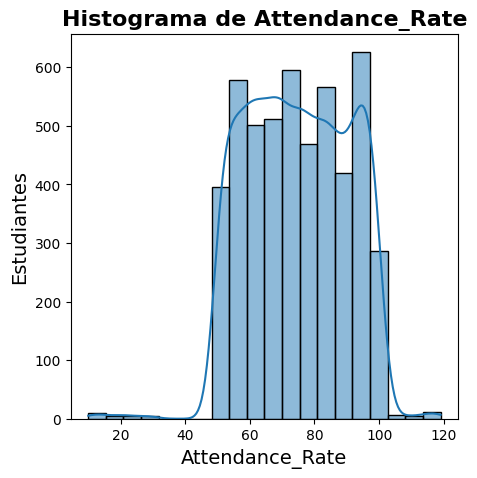

In [ ]:
# Vamos a estudiar Attendance_Rate
moda = data_frame.groupby('Attendance_Rate')['Attendance_Rate'].count().sort_values(ascending = False)[:1].values[0]
mediana = np.quantile(data_frame.Attendance_Rate, 0.5)
media = np.mean(data_frame.Attendance_Rate)
print("Moda {0} - Mediana {1} - Media {2}".format(moda, mediana, media))

num_bins = 20
plt.figure(figsize=(5,5))
sns.histplot(data_frame.Attendance_Rate, kde=True, bins = num_bins)
plt.xlabel('Attendance_Rate', fontsize=14)
plt.ylabel('Estudiantes', fontsize=14)
plt.title(r'Histograma de Attendance_Rate', fontsize=16, fontweight="bold");

---
✅ **Interpretación**

---


+ Se aprecia una asimetria negativa en el histograma

## Distribucion de una variable discreta

Moda 10 - Mediana 5.0 - Media 5.058


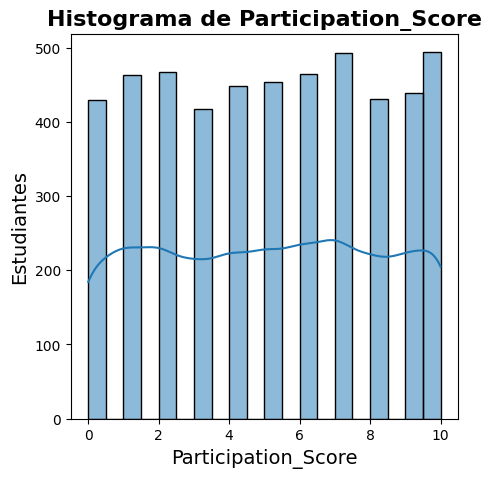

In [4]:
moda = data_frame['Participation_Score'].mode()[0]
mediana = np.quantile(data_frame.Participation_Score, 0.5)
media = np.mean(data_frame.Participation_Score)
print("Moda {0} - Mediana {1} - Media {2}".format(moda, mediana, media))

num_bins = 20
plt.figure(figsize=(5,5))
sns.histplot(data_frame.Participation_Score, kde=True, bins = num_bins)
plt.xlabel('Participation_Score', fontsize=14)
plt.ylabel('Estudiantes', fontsize=14)
plt.title(r'Histograma de Participation_Score', fontsize=16, fontweight="bold");

---
✅ **Interpretación**

---


+ Escriba acá sus interpretaciones

# Insight

## Insight 1 – Participación y rendimiento

¿Los estudiantes con mayor participación (Participation_Score) tienen mejores Final_Score?



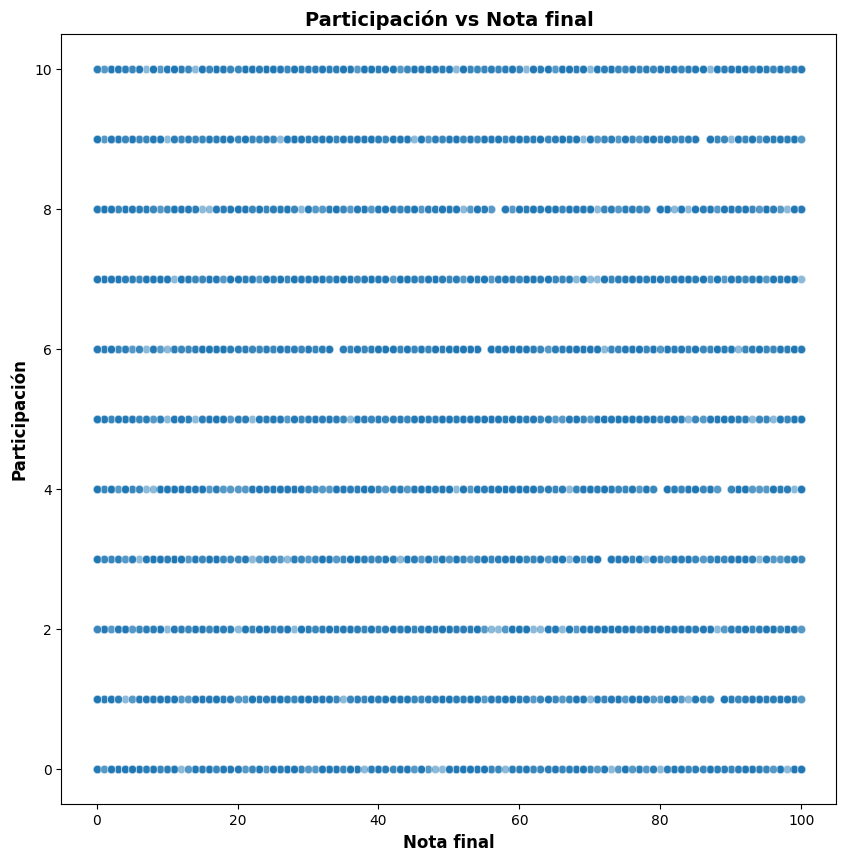

In [ ]:

plt.figure(figsize=(10, 10))
sns.scatterplot(x=data_frame["Final_Score"], y=data_frame["Participation_Score"], alpha=0.5)
plt.title("Participación vs Nota final", fontsize=14, fontweight="bold")
plt.xlabel("Nota final", fontsize=12, fontweight="bold")
plt.ylabel("Participación", fontsize=12, fontweight="bold")
plt.show()

---
✅ **Interpretación**

---


+ No se aprecia una relación entre la participación y la nota final del estudiante, ya que se observa que con alta participación se obtienen tanto notas altas y bajas y de la mismas forma con la baja participación.


##Insight 2 – Método de estudio más efectivo

¿Cuál Study_Method está asociado con mayor promedio de Final_Score?



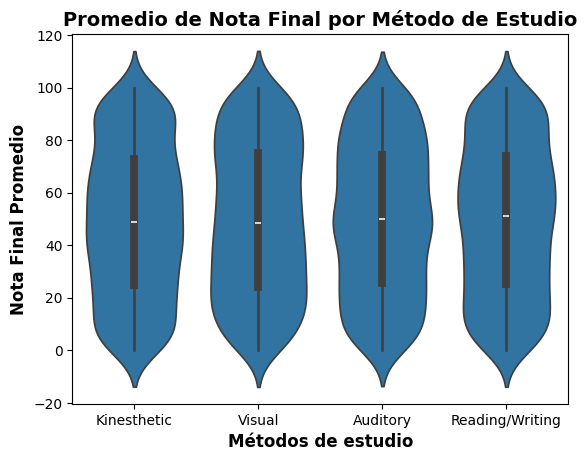

Promedio Kinesthetic: 49.25
Promedio Visual: 49.47
Promedio Auditory: 50.05
Promedio Reading/Writing: 49.89


In [7]:
sns.violinplot(x='Study_Method', y='Final_Score', data=data_frame)
plt.title("Promedio de Nota Final por Método de Estudio", fontsize=14, fontweight="bold")
plt.xlabel("Métodos de estudio", fontsize=12, fontweight="bold")
plt.ylabel("Nota Final Promedio", fontsize=12, fontweight="bold")
plt.show()
Prom_Kine = data_frame[data_frame.Study_Method == 'Kinesthetic']['Final_Score'].mean()
Prom_Visual =data_frame[data_frame.Study_Method == 'Visual']['Final_Score'].mean()
Prom_Audi = data_frame[data_frame.Study_Method == 'Auditory']['Final_Score'].mean()
Prom_Read =data_frame[data_frame.Study_Method == 'Reading/Writing']['Final_Score'].mean()
print(f"Promedio Kinesthetic: {Prom_Kine:.2f}")
print(f"Promedio Visual: {Prom_Visual:.2f}")
print(f"Promedio Auditory: {Prom_Audi:.2f}")
print(f"Promedio Reading/Writing: {Prom_Read:.2f}")

---
✅ **Interpretación**

---


+ No se puede observar ninguna relacion certera que asocie el metodo de estudio con el promedio de la nota final, ya que los resultados se muestran bastante parejos
+ En el metodo Reading/Writing y en el Auditory se puede observar una ligera tendencia a tener mejores notas
+ En el metodo Visual se aprecia que la nota final tiende a ser muy alta o muy baja
+ En el metodo Kinesthetic se aprecia una tendencia a notas ni altas ni bajas entre 40 y 60

##Insight 3 – Correlación horas de estudio vs. score final

¿Qué tan fuerte es la correlación entre Hours_Studied y Final_Score?



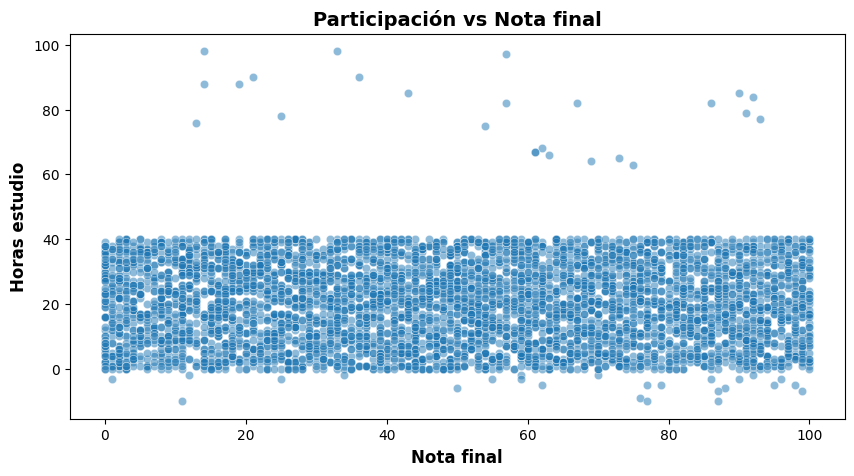

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data_frame["Final_Score"], y=data_frame["Hours_Studied"], alpha=0.5)
plt.title("Participación vs Nota final", fontsize=14, fontweight="bold")
plt.xlabel("Nota final", fontsize=12, fontweight="bold")
plt.ylabel("Horas estudio", fontsize=12, fontweight="bold")
plt.show()

---
✅ **Interpretación**

---

+ No se aprecia ninguna relación entre Hour_studied y Final_score, ya que se observa que con pocas horas estudiadas hay notas altas y bajas de la misma forma que con muchas horas de estudio
+ se observan horas de estudio que no tienen coherencia con el contexto de los datos, ya que se aprecian horas negativas

##Insight 4 – Identificación de valores atípicos extremos

¿Cuántos estudiantes tienen valores de Attendance_Rate fuera del rango [50, 100]? ¿Cómo se comportan sus otras métricas?

Cantidad de estudiantes fuera de rango: 50
        Student_ID  Hours_Studied  Attendance_Rate  Assignments_Completed  \
count    50.000000      50.000000        50.000000              50.000000   
mean   2411.680000      19.000000        65.340000               5.200000   
std    1434.140779      12.229105        47.204985               3.010187   
min      60.000000       0.000000        10.000000               0.000000   
25%    1171.000000       9.250000        19.000000               2.250000   
50%    2202.500000      19.500000        66.000000               6.000000   
75%    3489.750000      29.250000       112.750000               8.000000   
max    4906.000000      39.000000       119.000000              10.000000   

       Midterm_Score  Final_Score  Project_Score  Participation_Score  
count      50.000000    50.000000        50.0000            50.000000  
mean       44.580000    43.460000        53.1400             4.880000  
std        26.051041    26.422941        24.260

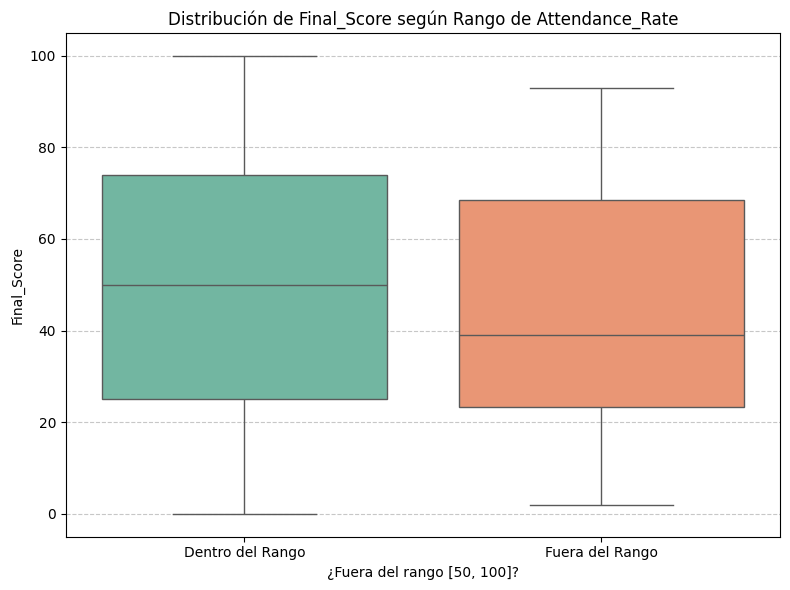

In [ ]:
fuera_de_rango = data_frame[(data_frame['Attendance_Rate'] < 50) | (data_frame['Attendance_Rate'] > 100)]
Cantidad_fuera_de_rango = fuera_de_rango.shape[0]
print(f"Cantidad de estudiantes fuera de rango: {Cantidad_fuera_de_rango}")

print(fuera_de_rango.describe())

# Crear una nueva columna que indique si el estudiante está fuera del rango o no
data_frame['Fuera_Rango_Asistencia'] = (data_frame['Attendance_Rate'] < 50) | (data_frame['Attendance_Rate'] > 100)

# Crear el boxplot para Final_Score
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuera_Rango_Asistencia', y='Final_Score', hue='Fuera_Rango_Asistencia', data=data_frame, palette='Set2', legend=False)
plt.title("Distribución de Final_Score según Rango de Attendance_Rate")
plt.xlabel("¿Fuera del rango [50, 100]?")
plt.ylabel("Final_Score")
plt.xticks([0, 1], ['Dentro del Rango', 'Fuera del Rango'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---
✅ **Interpretación**

---

+ Escriba acá sus interpretaciones

##Insight propuesto por el equipo

El Insight propuesto por el equipo para su estudio es :
- Metodo estudio vs horas estudio


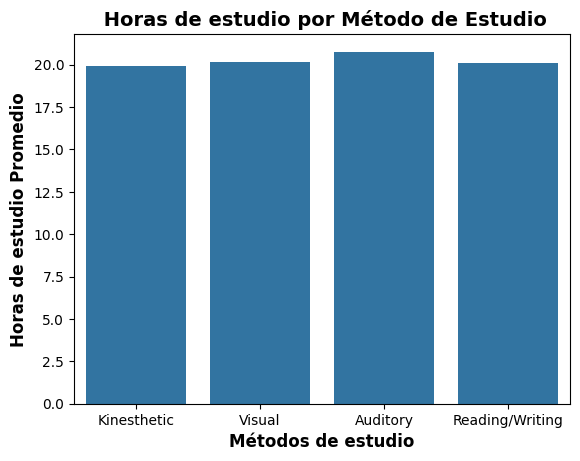

In [ ]:
sns.barplot(x='Study_Method', y='Hours_Studied', data=data_frame, errorbar=None)
plt.title(" Horas de estudio por Método de Estudio", fontsize=14, fontweight="bold")
plt.xlabel("Métodos de estudio", fontsize=12, fontweight="bold")
plt.ylabel("Horas de estudio Promedio", fontsize=12, fontweight="bold")
plt.show()

---
✅ **Interpretación**

---

+ Escriba acá sus interpretaciones